In [3]:
import pandas as pn

In [4]:
data = pn.read_csv(r"D:\All\Portfolio\Data\Data_Analyst_Assignment_Dataset.csv")

In [5]:
data.shape

(24582, 8)

In [6]:
# Calculating the risk labels for all the borrowers.

def solve(a):
    if len(a) <= 5:
        return 'Unknown Risk'
    if len(a) >= 6:
        num_b = a[-6:].count('B')
        num_l = a[-6:].count('L')
        total_count = num_b + num_l
        if total_count == 0:
            return 'Low Risk'
        num_bb = a[-6:-1].count('B')
        num_ll = a[-6:-1].count('L')
        total_count = num_bb + num_ll
        if total_count <= 2:
            return 'Medium Risk'
    return 'High risk'
    
df= data['Bounce String'].apply(lambda x: solve(x))

print(df)

0        Unknown Risk
1        Unknown Risk
2        Unknown Risk
3        Unknown Risk
4        Unknown Risk
             ...     
24577    Unknown Risk
24578    Unknown Risk
24579    Unknown Risk
24580    Unknown Risk
24581    Unknown Risk
Name: Bounce String, Length: 24582, dtype: object


In [7]:
# Adding the assigned labels with respect to the borrower in the data frame:

data['Risk Factor']= list(df)

In [8]:
print(data)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  
0               SSS             1

In [9]:
#labelling all customers based on where they are in their tenure:

def tenure(a,Tenure):
    if len(a) == 2 or a == 'FEMI':
        return 'Early Tenure'
    if int(Tenure) - len(a) == 3:
        return 'Late Tenure'
    return 'Mid Tenure'
    
dt = data[['Bounce String', 'Tenure']].apply(lambda x: tenure(x['Bounce String'], x['Tenure']), axis=1)

print(dt) 

0          Mid Tenure
1          Mid Tenure
2          Mid Tenure
3          Mid Tenure
4          Mid Tenure
             ...     
24577    Early Tenure
24578    Early Tenure
24579    Early Tenure
24580    Early Tenure
24581    Early Tenure
Length: 24582, dtype: object


In [10]:
# Adding the tenure labels as a new column in the data frame:

data['Tenure Range'] = list(dt)

print(data)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  
0               SSS

In [11]:
#Segment borrowers based on ticket size:

# Step1: First Lets sort the data frame on the basis of Amount Pending

dtk = data.sort_values(by='Amount Pending', ascending=True)

print(dtk)

       Amount Pending        State  Tenure  Interest Rate          City  \
1534              423  Maharashtra      11          11.84        Sangli   
1982              444   Tamil Nadu      11          12.23  VIRUDHUNAGAR   
889               451  Maharashtra       7          37.92          Pune   
265               522    Karnataka      11          12.83      Bagalkot   
1486              522  Maharashtra      11          12.83          Pune   
...               ...          ...     ...            ...           ...   
9776            12500  Maharashtra       8           0.00      Kolhapur   
13946           12500  Maharashtra       8           0.00          Pune   
23089           12500       Kerala       8           0.00    MALAPPURAM   
14009           12500  Maharashtra       8           0.00        Sangli   
13706           13349  Maharashtra       8           0.00        Nagpur   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  
1534           FEMI

In [12]:
# Step2: Finf the cumulative sum with respect to Amount Pending:

dtk['cumlt_sum'] = dtk['Amount Pending'].cumsum()

print(dtk)

       Amount Pending        State  Tenure  Interest Rate          City  \
1534              423  Maharashtra      11          11.84        Sangli   
1982              444   Tamil Nadu      11          12.23  VIRUDHUNAGAR   
889               451  Maharashtra       7          37.92          Pune   
265               522    Karnataka      11          12.83      Bagalkot   
1486              522  Maharashtra      11          12.83          Pune   
...               ...          ...     ...            ...           ...   
9776            12500  Maharashtra       8           0.00      Kolhapur   
13946           12500  Maharashtra       8           0.00          Pune   
23089           12500       Kerala       8           0.00    MALAPPURAM   
14009           12500  Maharashtra       8           0.00        Sangli   
13706           13349  Maharashtra       8           0.00        Nagpur   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
1534           FEM

In [13]:
# Step3: We should segment the borrowers into 3 Categories, lets find 1/3rd of Sum of Total Amount Pending:

Sum = dtk['Amount Pending'].sum()
comparison_value = Sum/3

print(comparison_value)

14676869.0


In [14]:
# Step4: Assining the Ticket Size with respect to cumulative sum and 1/3rd of Sum of Total Amount Pending:

dtk['Ticket Size'] = dtk['cumlt_sum'].apply(lambda x: 'Low Ticket Size' if x <= comparison_value else ('Medium Ticket Size' if comparison_value < x <= 2*comparison_value else 'High Ticket Size'))
print(dtk)

       Amount Pending        State  Tenure  Interest Rate          City  \
1534              423  Maharashtra      11          11.84        Sangli   
1982              444   Tamil Nadu      11          12.23  VIRUDHUNAGAR   
889               451  Maharashtra       7          37.92          Pune   
265               522    Karnataka      11          12.83      Bagalkot   
1486              522  Maharashtra      11          12.83          Pune   
...               ...          ...     ...            ...           ...   
9776            12500  Maharashtra       8           0.00      Kolhapur   
13946           12500  Maharashtra       8           0.00          Pune   
23089           12500       Kerala       8           0.00    MALAPPURAM   
14009           12500  Maharashtra       8           0.00        Sangli   
13706           13349  Maharashtra       8           0.00        Nagpur   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
1534           FEM

In [15]:
# Dropping the cumulative sum column, since no further need:

dtk.drop(columns=['cumlt_sum'], inplace=True)

In [16]:
print(dtk)

       Amount Pending        State  Tenure  Interest Rate          City  \
1534              423  Maharashtra      11          11.84        Sangli   
1982              444   Tamil Nadu      11          12.23  VIRUDHUNAGAR   
889               451  Maharashtra       7          37.92          Pune   
265               522    Karnataka      11          12.83      Bagalkot   
1486              522  Maharashtra      11          12.83          Pune   
...               ...          ...     ...            ...           ...   
9776            12500  Maharashtra       8           0.00      Kolhapur   
13946           12500  Maharashtra       8           0.00          Pune   
23089           12500       Kerala       8           0.00    MALAPPURAM   
14009           12500  Maharashtra       8           0.00        Sangli   
13706           13349  Maharashtra       8           0.00        Nagpur   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
1534           FEM

In [17]:
#Sorting the data frame with respect to index:

data = dtk.sort_index()

print(data)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
0               SS

In [18]:
# Lets segment the borrowers on Amount Pending into to three categories

# Low EMI, Medium EMI, High EMi

# For this lets find the Maximum EMI the data frame has and divide it into 3 Equal parts and assign labels

max_emi = data['Amount Pending'].max()

print(max_emi)

data['Pending EMI_Range'] = data['Amount Pending'].apply(lambda x: 'Low EMI P' if x <= max_emi/3 else('Medium EMI P' if x <= 2*max_emi/3 else 'High EMI P')
                                                        )
print(data)

13349
       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
0           

In [19]:
# Lets segment the borrowers on Interest Rate into to three categories

# Low Interest, Medium Interest, High Interest

# For this lets find the Maximum Intesrest the data frame has and divide it into 3 Equal parts and assign labels

max_intst = data['Interest Rate'].max()

print(max_intst)

data['Interest Range'] = data['Interest Rate'].apply(lambda x: 'Low Intrst' if x <= max_intst/3 else('Medium Intrst' if x <= 2*max_intst/3 else 'High Intrst'))

print(data)

37.92
       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
0           

In [20]:
#Finding all the states present in data frame to find out hindi speaking states:

print(data['State'].unique())

['Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Tamil Nadu' 'Telangana'
 'Kerala' 'Andhra Pradesh']


In [21]:
hindi_state = {'Madhya Pradesh' 'Maharashtra'}

In [22]:
# Assigning all the borrowers as hindi speakers who have hailed from Madhya Pradesh and maharashtra states:

hindi_state = {'Madhya Pradesh', 'Maharashtra'}
def hindi(a):
    if a in hindi_state:
        return 'HS'
    else:
        return 'NHS'
        
data['HS or NHS'] = data['State'].apply(lambda x :hindi(x))

print(data)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
0               SS

In [23]:
# Identifying metro cities Data to assign whether the city is metropolitan city or not:

metro_cities = {'mumbai',' delhi', 'kolkata', 'chennai', 'bangalore', 'hyderabad', 'ahmedabad', 'pune', 'surat'}
def metro(a):
    if a in metro_cities:
        return 'Metro'
    else:
        return 'Non-Metro'
        
data['M or NM'] = data['City'].str.lower().apply(lambda x: metro(x))

print(data)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
0               SS

In [24]:
# Defining conditions to assign Whatsapp Bot Spend Channels:

import numpy as np

condition_W1 = (data['Risk Factor'] == 'Low Risk') | (data['Risk Factor'] == 'Unknown Risk')
condition_W2 = (data['Pending EMI_Range'] == 'Low EMI P')

In [25]:
# Assigning the borrowers with respect to conditions for a whatsapp Bot for Communication:

data.loc[condition_W1 & condition_W2, "Spend_recommendations"] = 'Whatsapp Bot'

print(data)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
0               SS

In [26]:
# Defining conditions to assign Voice Bot Spend Channels:

# Assigning the borrowers with respect to conditions for a Voice Bot for Communication:

condition_v0 = (data['Spend_recommendations'] != 'Whatsapp Bot')
condition_v1 = (data['Risk Factor'] == 'Medium Risk')
condition_v2 = (data['Pending EMI_Range'] == 'Low EMI P') | (data['Pending EMI_Range'] == 'Medium EMI P')
condition_v3 = (data['HS or NHS'] == 'HS') | (data['HS or NHS'] == 'NHS')
condition_v4 = (data['Interest Range'] == 'Low Intrst')

data.loc[condition_v0 & condition_v1 & condition_v2 & condition_v3 & condition_v4, "Spend_recommendations"] = 'Voice Bot'

print(data)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
0               SS

In [27]:
# Assigning the borrowers with respect to conditions for a Human Calling for Communication:

condition_h1 = (data['Spend_recommendations'] !=  'Voice Bot') &  (data['Spend_recommendations'] != 'Whatsapp Bot')
data.loc[condition_h1, "Spend_recommendations"] = 'Human Calling'

In [28]:
print(data)

       Amount Pending           State  Tenure  Interest Rate       City  \
0                 963       Karnataka      11           7.69  Bangalore   
1                1194       Karnataka      11           6.16  Bangalore   
2                1807       Karnataka      14           4.24     Hassan   
3                2451       Karnataka      10           4.70  Bangalore   
4                2611       Karnataka      10           4.41     Mysore   
...               ...             ...     ...            ...        ...   
24577             899  Andhra Pradesh       8           0.00   Chittoor   
24578            2699  Andhra Pradesh       8           0.00    Krishna   
24579            1540  Andhra Pradesh       8           0.00    Krishna   
24580             824  Andhra Pradesh       8           0.00     Guntur   
24581            2254  Andhra Pradesh      11           0.00    Kurnool   

      Bounce String  Disbursed Amount Loan Number   Risk Factor  Tenure Range  \
0               SS

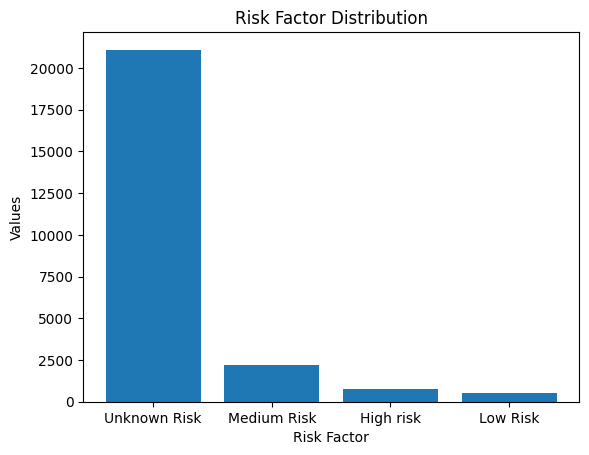

In [29]:
# Graphical Analysis Representation of Risk Factor Disitribution across the borowwers:

import matplotlib.pyplot as plt

value_counts = data['Risk Factor'].value_counts()
categories = value_counts.index.tolist()
values = value_counts.tolist()
plt.bar(categories, values)
plt.xlabel('Risk Factor')
plt.ylabel('Values')
plt.title('Risk Factor Distribution')
plt.show()


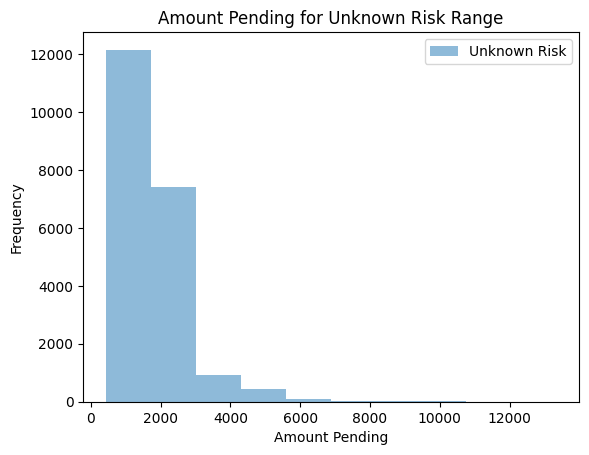

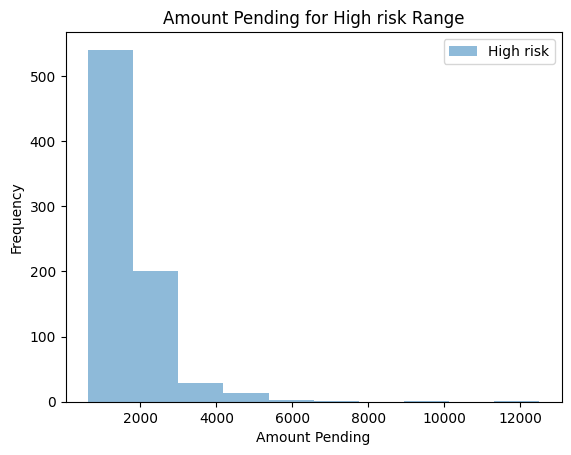

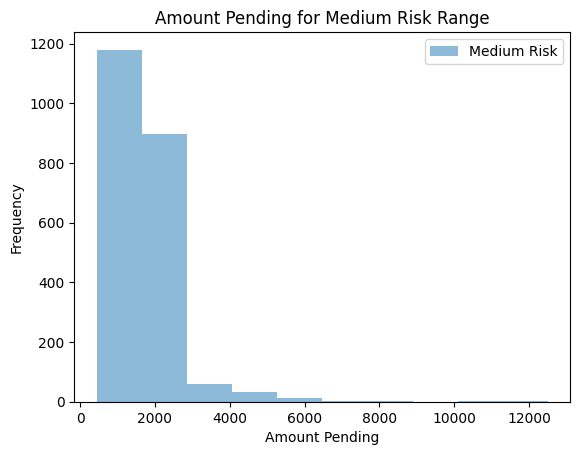

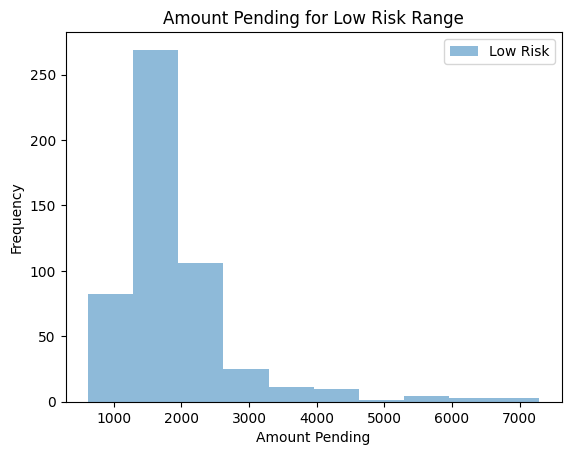

In [30]:
# A Histogram plot representing Amount Pending for the Risk Factor the barrowers pose: 

Risk_Factor_Categories = data['Risk Factor'].unique()
for category in Risk_Factor_Categories:
    subset = data[data['Risk Factor'] == category]
    plt.hist(subset['Amount Pending'], bins=10, alpha=0.5, label=category) 
    plt.xlabel('Amount Pending')
    plt.ylabel('Frequency')
    plt.title(f'Amount Pending for {category} Range')
    plt.legend()
    plt.show()

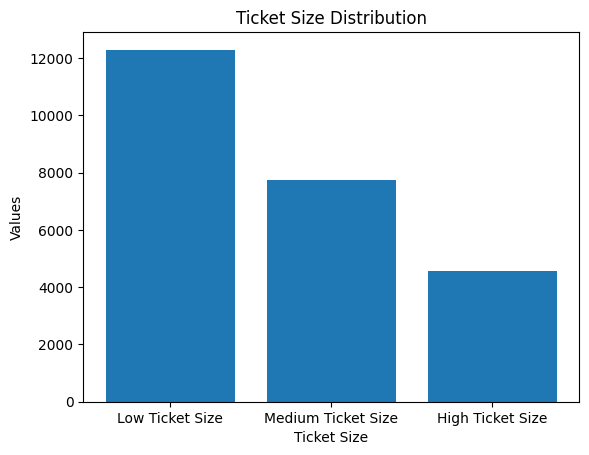

In [31]:
# Ticket Size distribution of the borrowers:

value_counts = data['Ticket Size'].value_counts()
categories = value_counts.index.tolist()
values = value_counts.tolist()
plt.bar(categories, values)
plt.xlabel('Ticket Size')
plt.ylabel('Values')
plt.title('Ticket Size Distribution')
plt.show()


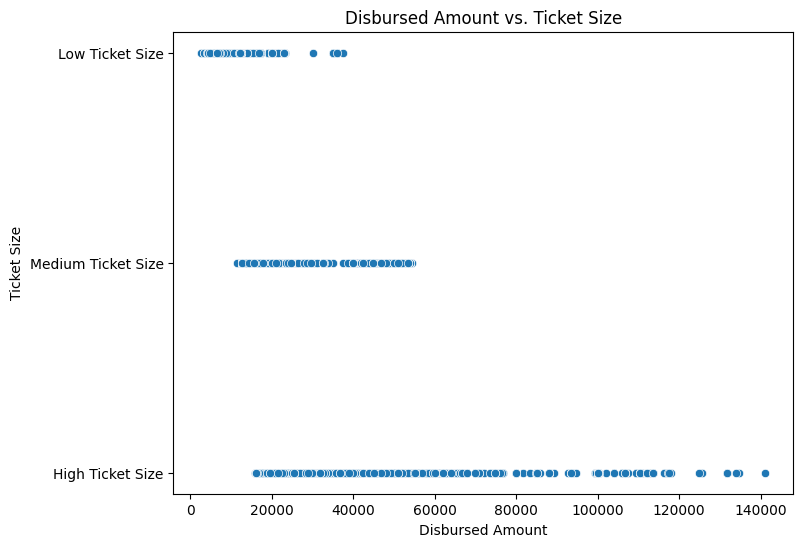

In [32]:
# A scatter plot representation showing the ticket size with respect to Amount Disbursed:

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Disbursed Amount', y='Ticket Size', data=data)
plt.title('Disbursed Amount vs. Ticket Size')
plt.xlabel('Disbursed Amount')
plt.ylabel('Ticket Size')
plt.show()

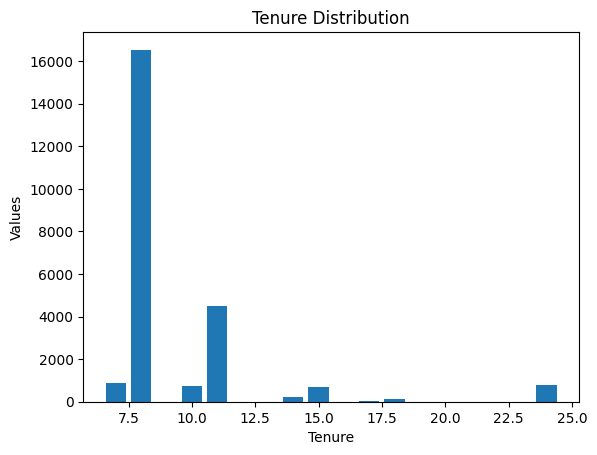

In [33]:
# Tenure distribution of the borrowers:

value_counts = data['Tenure'].value_counts()
categories = value_counts.index.tolist()
values = value_counts.tolist()
plt.bar(categories, values)
plt.xlabel('Tenure')
plt.ylabel('Values')
plt.title('Tenure Distribution')
plt.show()


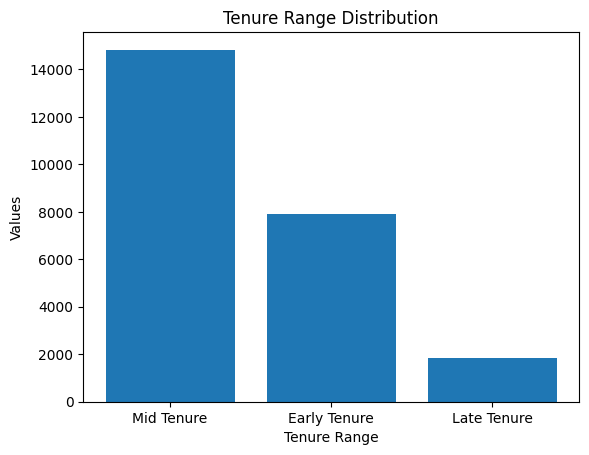

In [34]:
# Tenure range of the borrowers:

value_counts = data['Tenure Range'].value_counts()
categories = value_counts.index.tolist()
values = value_counts.tolist()
plt.bar(categories, values)
plt.xlabel('Tenure Range')
plt.ylabel('Values')
plt.title('Tenure Range Distribution')
plt.show()

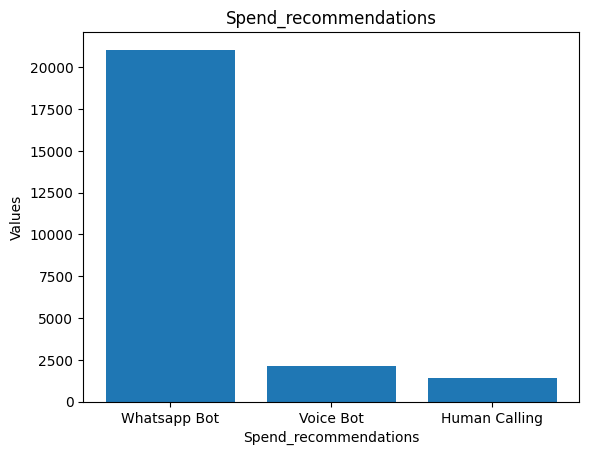

In [35]:
# Spend recommendation with respect to conditions for each channel:

value_counts = data['Spend_recommendations'].value_counts()
categories = value_counts.index.tolist()
values = value_counts.tolist()
plt.bar(categories, values)
plt.xlabel('Spend_recommendations')
plt.ylabel('Values')
plt.title('Spend_recommendations')
plt.show()

In [36]:
# Calculating the Sum of Amount Pending with respect to communication channel preferred:

amount_pending = [data.loc[data['Spend_recommendations']== 'Whatsapp Bot',"Amount Pending"].sum(),
                      data.loc[data['Spend_recommendations']== 'Voice Bot',"Amount Pending"].sum(),
                      data.loc[data['Spend_recommendations']== 'Human Calling',"Amount Pending"].sum()]
print(amount_pending)

[35734848, 3732523, 4563236]


In [37]:
# Calculationg how many times each channel is preferred:

whatsapp = (data['Spend_recommendations']== 'Whatsapp Bot').sum()
voice = (data['Spend_recommendations']== 'Voice Bot').sum()
human = (data['Spend_recommendations']== 'Human Calling').sum()

print(whatsapp,voice,human)

21057 2119 1406


In [38]:
# Calculating the cost of each channel:

Spending = [whatsapp*5,voice*10,human*50]

print(Spending)

[105285, 21190, 70300]


In [39]:
# Data frame showing the amount pending and cost of communication through each channel:

Cost = {
        'amountpending': amount_pending,
    'Spending': Spending,
    'Channel' : ['Whatsapp Bot','Voice Bot','Human Calling']
}

Cost_Analysis = pn.DataFrame(Cost)

print(Cost_Analysis)


   amountpending  Spending        Channel
0       35734848    105285   Whatsapp Bot
1        3732523     21190      Voice Bot
2        4563236     70300  Human Calling


# Spend Recommendation Analysis:
The above dataframe shows that, for borrowers with good repayment behaviour and low EMI a whatsapp Bot for communication is effective as the amount
pending to be repayed is huge ie., 81% of total amount pending and cost for communication is only 53% of the total amount spent and only 0.23% of the total amount pending.
Since the rest 29% of total amount pendin to be repayed comes under medium to high risk, 47% of the total spent is uesd.